# Numerische Methoden für Differentialgleichungen
## Aufgabenblatt 6
*gelöst von Stollmayer Max*

Zu implementieren ist eine Finite-Differenzen-Methode für die Poisson-Gleichung:

$$\begin{cases}
    -\Delta u(x,y)=f(x,y),\quad (x,y)\in\Omega=[0,1]\times[0,1] \\
    u(x,y)=v(x,y),\quad (x,y)\in\partial\Omega
\end{cases}$$

wobei $f(x,y)=sin(x\cdot y)\cdot(x^2+y^2)$, und $v(x,y)=sin(x\cdot y)$.

In [78]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rcdefaults

rcdefaults()
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = [12.8, 7.2]
plt.rcParams["font.size"] = 12
plt.rcParams["axes.edgecolor"] = "white"
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.framealpha"] = 0.75
plt.rcParams["legend.facecolor"] = "white"
plt.rcParams["legend.edgecolor"] = "white"

In [77]:
def SOR(A, b, w=1, init=None, tol=0.01):
    '''
    Solves A x = b using the successive over-relaxation algorithm.
    Returns vector x.
    
    A ...... NxN matrix
    b ...... vector of length N
    w ...... relaxation factor
    init ... initial guess
    tol .... tolerance for stopping the iteration
    '''
    
    N = len(b)
    x = np.zeros(n) if init == None else init
    
    while np.allclose(A @ x, b):
        for i in range(N):
            s = np.dot(A[i, :], x) - A[i, i] * x[i]
            x[i] = x[i] + w * ((b[i] - s) / A[i, i] - x[i])
    return x

In [104]:
def solvePoisson(f, g, a, b, N):
    '''
    Solves -Delta u(x,y) = f(x,y) with the boundary condition u(x,y) = g(x,y) on a discretized, equidistant square.
    
    f ... 
    g ... boundary condition function
    a ... 
    b ...
    N ...
    '''
    
    # grid generation
    h = (b - a) / N
    axis = a + h * np.arange(N+1)
    grid = np.mgrid[a:b+h:h, a:b+h:h]
    print("grid:\n", grid)
    print("grid shape:", grid.shape)
    
    # f values on the grid
    fvals = f(axis[:, None], axis[None, :])
    print("fvals:\n", fvals)
    print("fvals shape:", fvals.shape)
    
    # g values on the boundary
    grid[0, i, j]
    gvals = np.zeros((N+1, N+1))
    gvals[0, :] = g(axis[:, None], )  # bottom
    gvals[N, :] = g()  # top
      # left side
      # right side
    
    for i in range(N+1):
        gvals[i, 0] = g(*grid[i, 0])
        gvals[i, N] = g(*grid[i, N])
        if i == 0 or i == N+1:
            for j in range(N+1):
                gvals[i, j] = g(*grid[i, j])
    print("gvals:\n", gvals)
    print("gvals shape:", gvals.shape)
    
    # system matrix generation
    ones = np.ones(N-1)
    T = np.diagflat(-ones[:-1], -1) + np.diagflat(4 * ones) + np.diagflat(-ones[:-1], 1)
    A = np.kron(np.eye(N-1), T)
    A += np.kron(np.diagflat(np.ones(N-2), 1), np.eye(N-1))
    A += np.kron(np.diagflat(np.ones(N-2), -1), np.eye(N-1))
    
    # system vector generation
    b = fvals[1:N-1, 1:N-1].flatten()
    
    # solve system
    sol = SOR(A, b)
    
    # solution u values
    uvals = gvals.copy()
    uvals[1:N-1, 1:N-1] = sol.reshape(N-1, N-1)
    
    return uvals

In [105]:
solvePoisson(f, v, a, b, 5)

grid:
 [[[0.  0.  0.  0.  0.  0. ]
  [0.2 0.2 0.2 0.2 0.2 0.2]
  [0.4 0.4 0.4 0.4 0.4 0.4]
  [0.6 0.6 0.6 0.6 0.6 0.6]
  [0.8 0.8 0.8 0.8 0.8 0.8]
  [1.  1.  1.  1.  1.  1. ]]

 [[0.  0.2 0.4 0.6 0.8 1. ]
  [0.  0.2 0.4 0.6 0.8 1. ]
  [0.  0.2 0.4 0.6 0.8 1. ]
  [0.  0.2 0.4 0.6 0.8 1. ]
  [0.  0.2 0.4 0.6 0.8 1. ]
  [0.  0.2 0.4 0.6 0.8 1. ]]]
grid shape: (2, 6, 6)
fvals:
 [[0.         0.         0.         0.         0.         0.        ]
 [0.         0.00319915 0.01598294 0.04788488 0.10833638 0.2066161 ]
 [0.         0.01598294 0.05098183 0.12360537 0.25165325 0.45172528]
 [0.         0.04788488 0.12360537 0.25363745 0.46177918 0.76791376]
 [0.         0.10833638 0.25165325 0.46177918 0.76441016 1.17646399]
 [0.         0.2066161  0.45172528 0.76791376 1.17646399 1.68294197]]
fvals shape: (6, 6)


UnboundLocalError: local variable 'i' referenced before assignment

In [32]:
def error(exact_vals, approx_vals):
    '''Maxmimum norm'''
    return max(np.abs(exact_vals - approx_vals))

def order(error, step_size):
    '''Approximation of order of convergence'''
    return np.log(error) / np.log(step_size)


def f(x,y):
    return np.sin(x*y) * (x**2 + y**2)

def v(x,y):
    return np.sin(x*y)

def exact(x,y):
    return v(x,y)

a = 0
b = 1
steps = 2**np.arange(3,8)


In [ ]:
vals = ()
errors = ()
rates = ()

for N in steps:
h = (b - a) / N
grid = a + h * np.arange(N+1)

u = FDM(f, grid, ua, ub)
vals += (u,)

e = error(u, exact(grid))
errors += (e,)
rates += (order(e, h),)

plt.plot(grid, u, label=f"{N} steps")

rates = order(errors,(b-a)/steps)
print("steps | error    | rate")
for N, e, r in zip(steps, errors, rates):
    print(f"  {N:3.0f} | {e:.2E} |   {r:2.0f}")

x = np.linspace(0, 2, 101)
plt.plot(x, exact(x), "k", label="exact")
plt.legend()
plt.show()

In [56]:
T = np.arange(9).reshape(3,3)
print(T)
T.flatten()


[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([0, 1, 2, 3, 4, 5, 6, 7, 8])

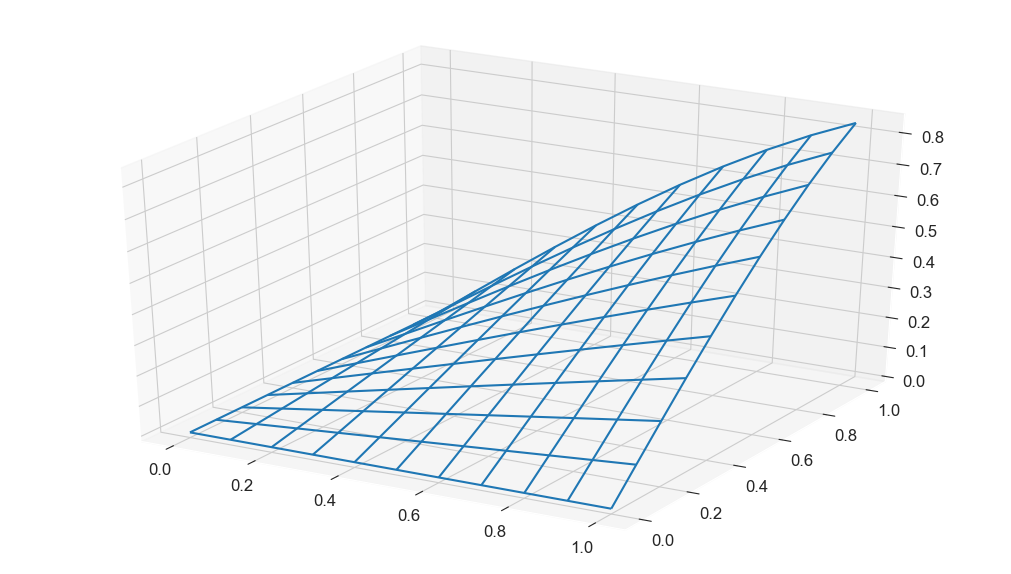

In [99]:
a = 0
b = 1
N = 10
h = (b - a) / N
x, y = np.mgrid[0:1+h:h, 0:1+h:h]
axis = a + h * np.arange(N+1)
z = v(axis[:, None], axis[None, :])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(x, y, z)
plt.show()

In [94]:
np.mgrid[0:1+h:h, 0:1+h:h]

array([[[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
        [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
        [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
        [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6],
        [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7],
        [0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8],
        [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
        [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]],

       [[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
        [0. , 0.1, 0.2,